# Практика EDA, знакомство с данными, построение визуализаций

## 1. Импорт библиотек

In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Загрузка датасета

In [12]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 3. Размер и базовые стастистики датасета

In [13]:
df.shape

(569, 33)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
# удалим незначащие колонки
df = df.drop(columns = ['id','Unnamed: 32'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Судя по описанию, данный датасет представляет собой признаки клеток, взятых для анализа рака молочной железы. По результатам парметров клеток ставится диагноз доброкачевенная опухоль или злокачесвенная. Отметка диагназа в колонке diagnosis (M = malignant, B = benign)  

Из первичного анализа можно сделать вывод, что датасет содержит 569 строк и 33 колонки, 31 из которых числовая, 1 - результирующая и 1 мусорная. Пропусков в датасете нет. Удалил мусорную колоку и колонку с id записей, так как она не влияет на диагноз.

## 4. EDA

In [18]:
# # заменим
# df['diagnosis']=df['diagnosis'].map({'M': 1, 'B': 0})
# df.head()

In [23]:
df_[df.diagnosis == 'M'][col]

0      0.11890
1      0.08902
2      0.08758
3      0.17300
4      0.07678
        ...   
563    0.09873
564    0.07115
565    0.06637
566    0.07820
567    0.12400
Name: fractal_dimension_worst, Length: 212, dtype: float64

### 4.1 Гистограмма рапределения признаков

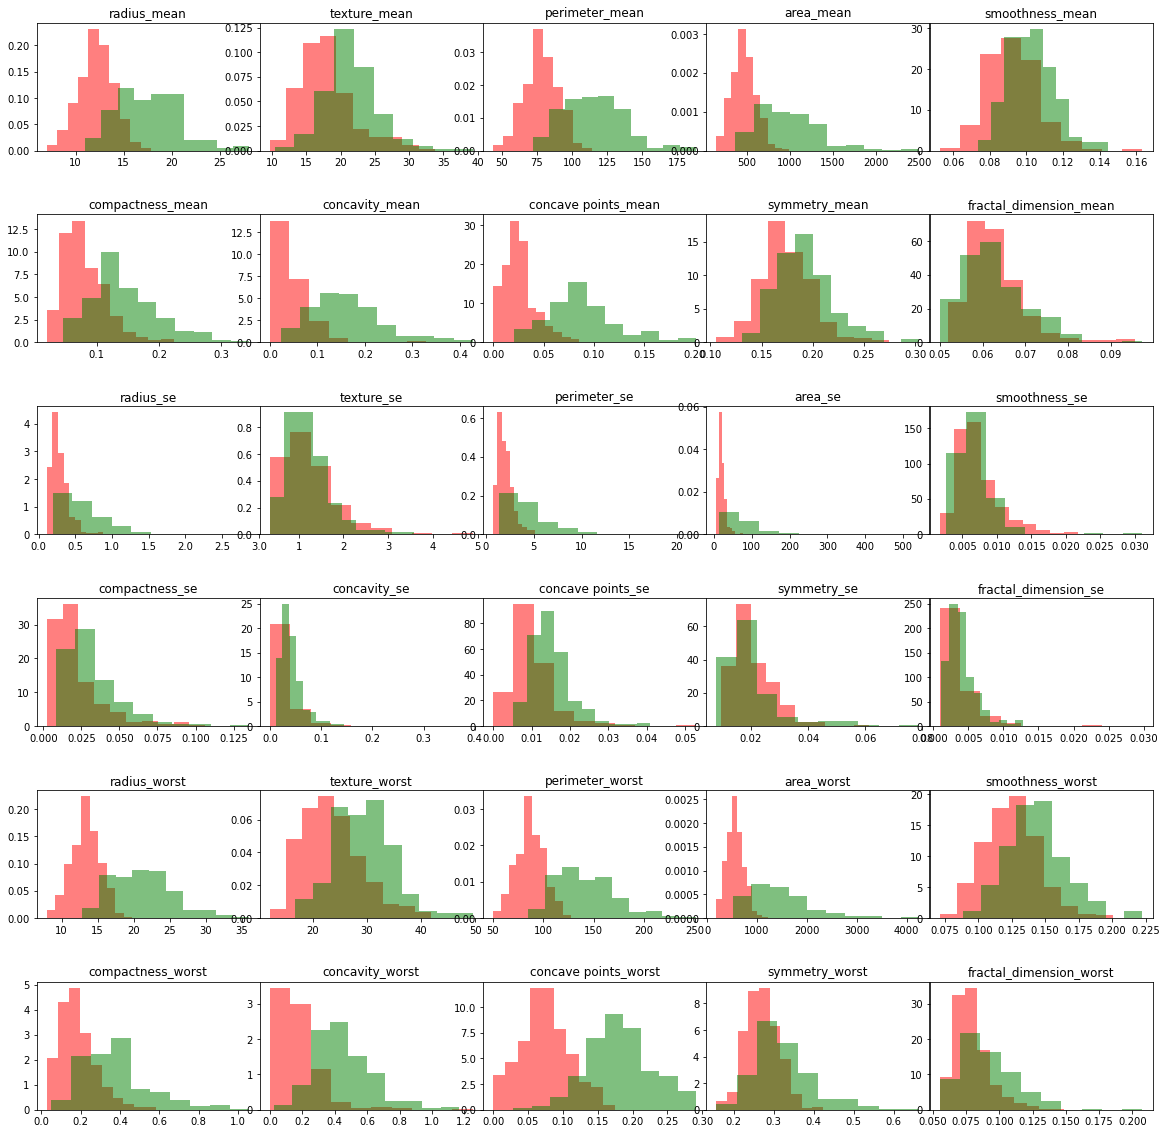

In [24]:
fig, axs = plt.subplots(6,5, figsize=(20, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)
df_ = df.drop(columns = ['diagnosis'])
axs = axs.ravel()

for col,i in zip(df_.columns, range(df_.shape[1])):
    axs[i].hist(df[df.diagnosis == 'B'][col] ,color = 'r', alpha = 0.5, density=True)
    axs[i].hist(df[df.diagnosis == 'M'][col], color = 'g', alpha = 0.5, density=True)
    axs[i].set_title(col)
# ('Сравнение распределения признаков датасета (зеленый цвет - доброкачественная опухоль, красный - злокачественная)')

По графикам видно, что распределение части признков доброкачественных клеток значительно отличается от злокчественных, а части признаков почти совпадает, то есть какой-то единой тенденции в распределениях найти не удалось

### 4.2 Матрица корреляций

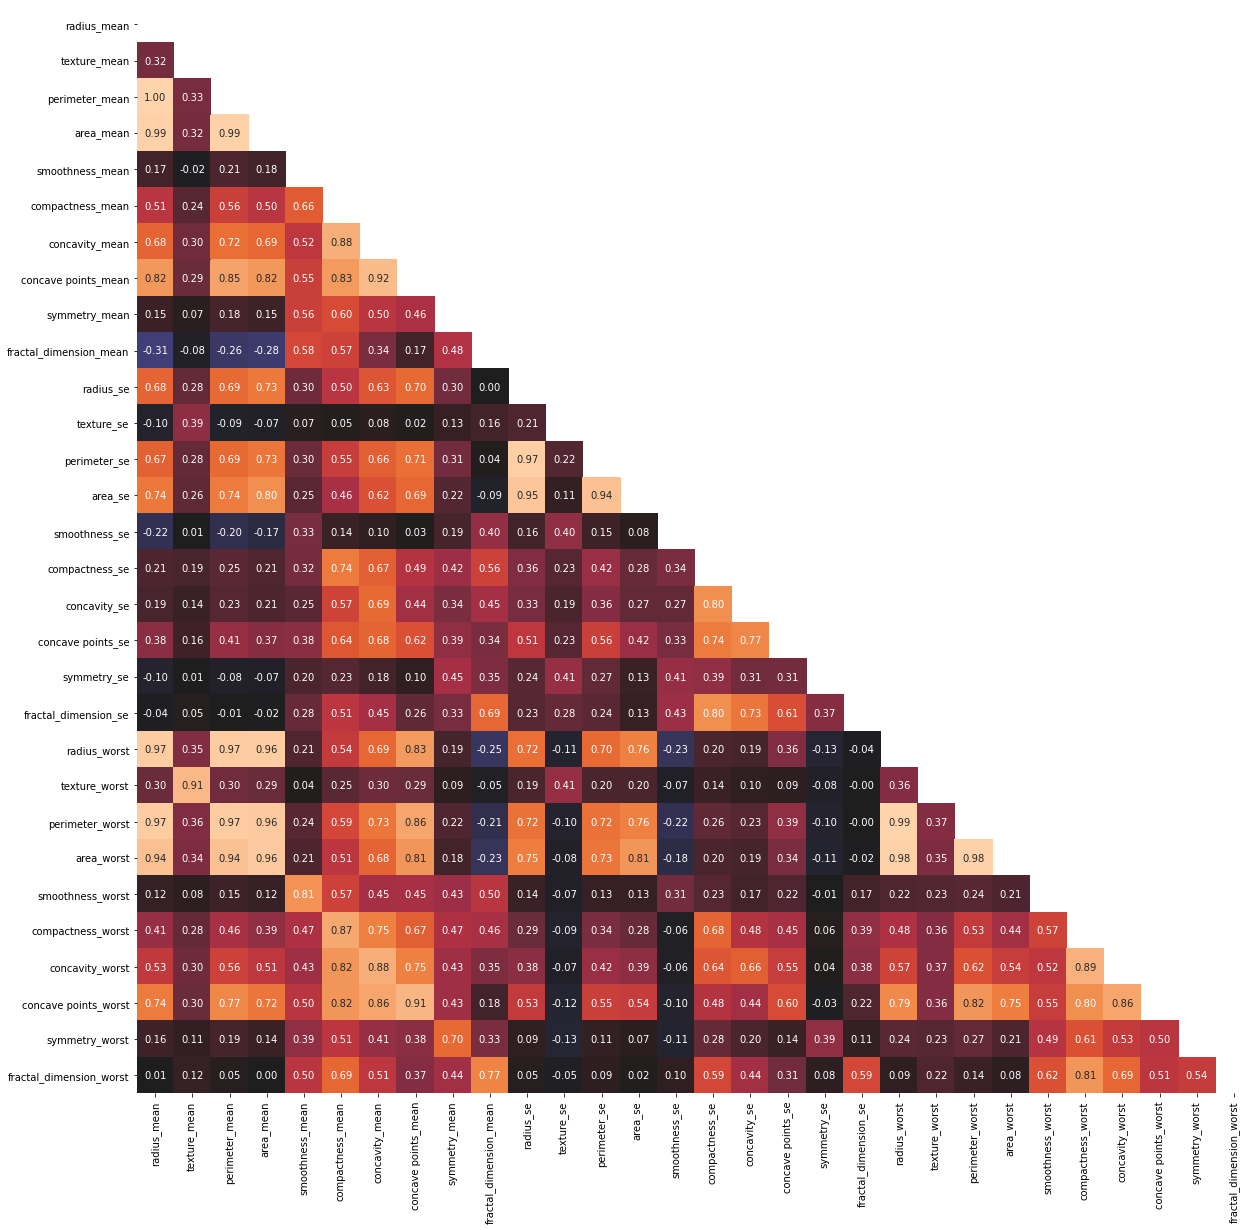

In [25]:
plt.figure(figsize=(20,20))

corr_matrix = df_.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0);

In [33]:
high_corr = [
    column for column in lower.columns if any((lower[column] > 0.6)|(lower[column] < -0.6))
]
high_corr

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst']

In [27]:
df_.shape[1], df_[high_corr].shape[1]

(30, 22)

#### По анализу таблицы корреляций можно сдлеать вывод, что признаки значительно скоррелированы, у 22 из 30 признаков корреляция больше 0.6 или меньше -0.6

### 4.5 Scatterplot для скоррелированных признаков

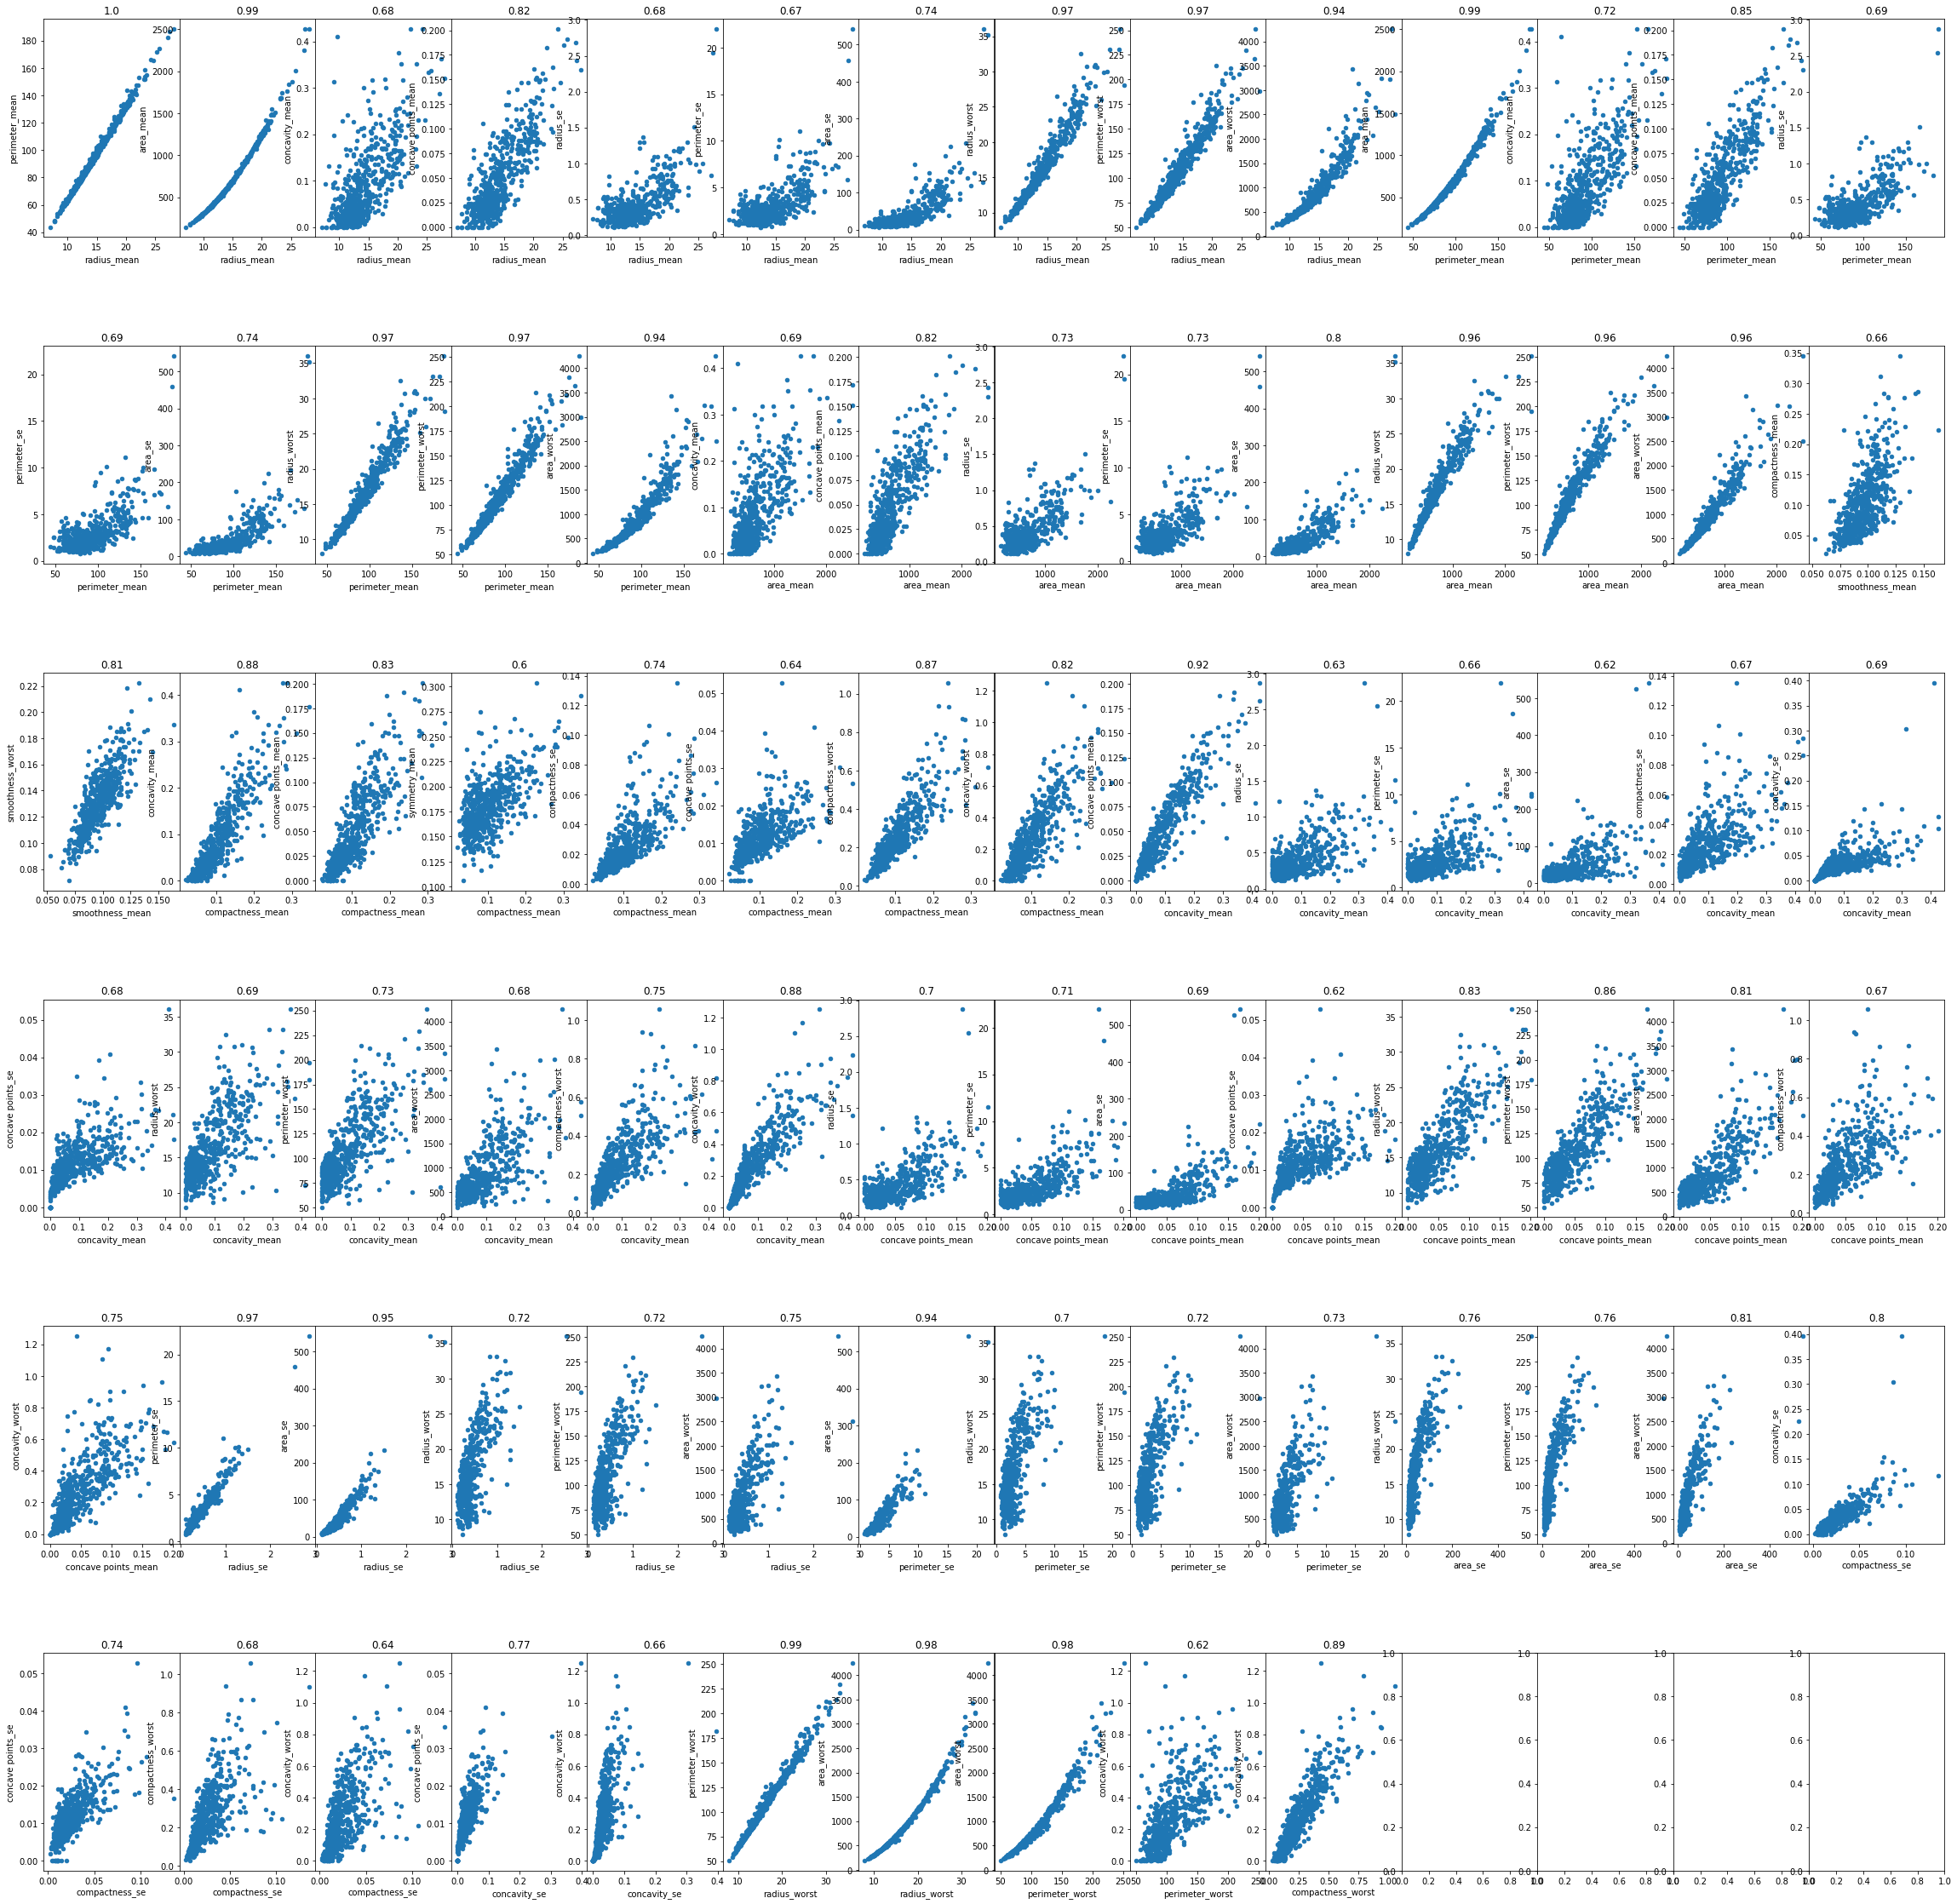

In [125]:
fig, axs = plt.subplots(6,14, figsize=(40, 40))
fig.subplots_adjust(hspace = .5, wspace=.001)
df_hcorr= df[high_corr]
axs = axs.ravel()
corr_list = []
i_ax = 0

for i in range(df_hcorr.shape[1]):
    for j in range(df_hcorr.shape[1]):
        cor_cols = df_hcorr[[df_hcorr.columns[i],df_hcorr.columns[j]]].corr().iloc[0][1]
        if (df_hcorr.columns[i] != df_hcorr.columns[j] and abs(cor_cols) > 0.6) and cor_cols not in corr_list:
#             print( df_hcorr.columns[i],df_hcorr.columns[j], cor_cols)
            df_hcorr.plot(x = df_hcorr.columns[i], y = df_hcorr.columns[j], kind = 'scatter', ax = axs[i_ax])
            axs[i_ax].set_title(round(cor_cols,2)) 
            i_ax = i_ax + 1
                       
        corr_list.append(cor_cols)
        


#### По графикам видно, что контур точек зависит от степени корреляции, чем ближе к 1, тем более вытянутая форма точек

### 4.6 Boxplots и группировка по целевой переменной

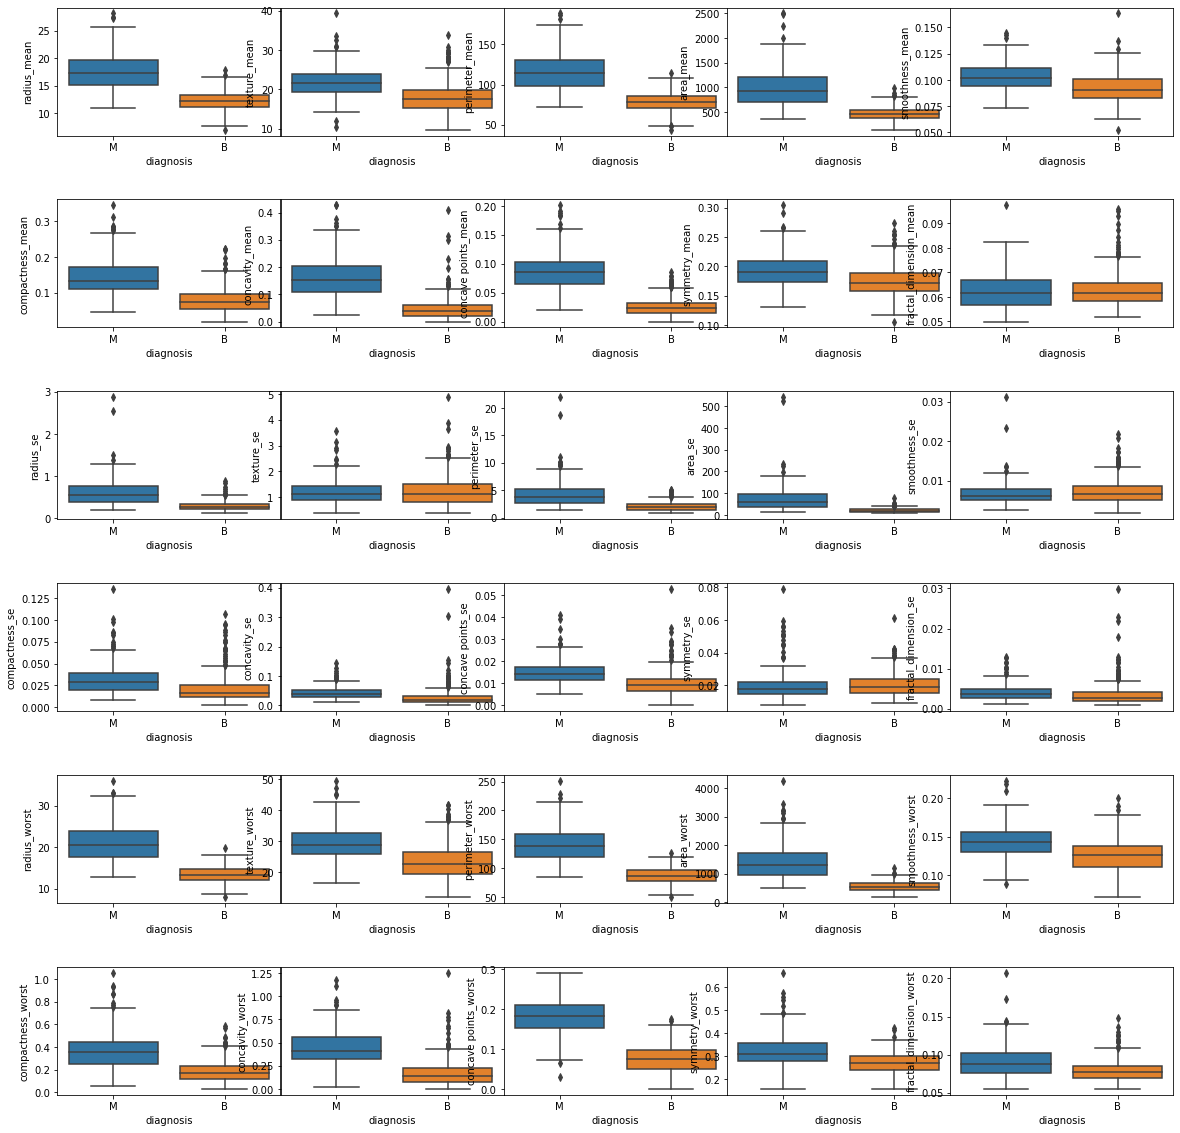

In [135]:
fig, axs = plt.subplots(6,5, figsize=(20, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)
df_ = df.drop(columns = ['diagnosis'])
axs = axs.ravel()

for col,i in zip(df_.columns, range(df_.shape[1])):
    sns.boxplot(x="diagnosis", y=col, data=df, ax = axs[i])

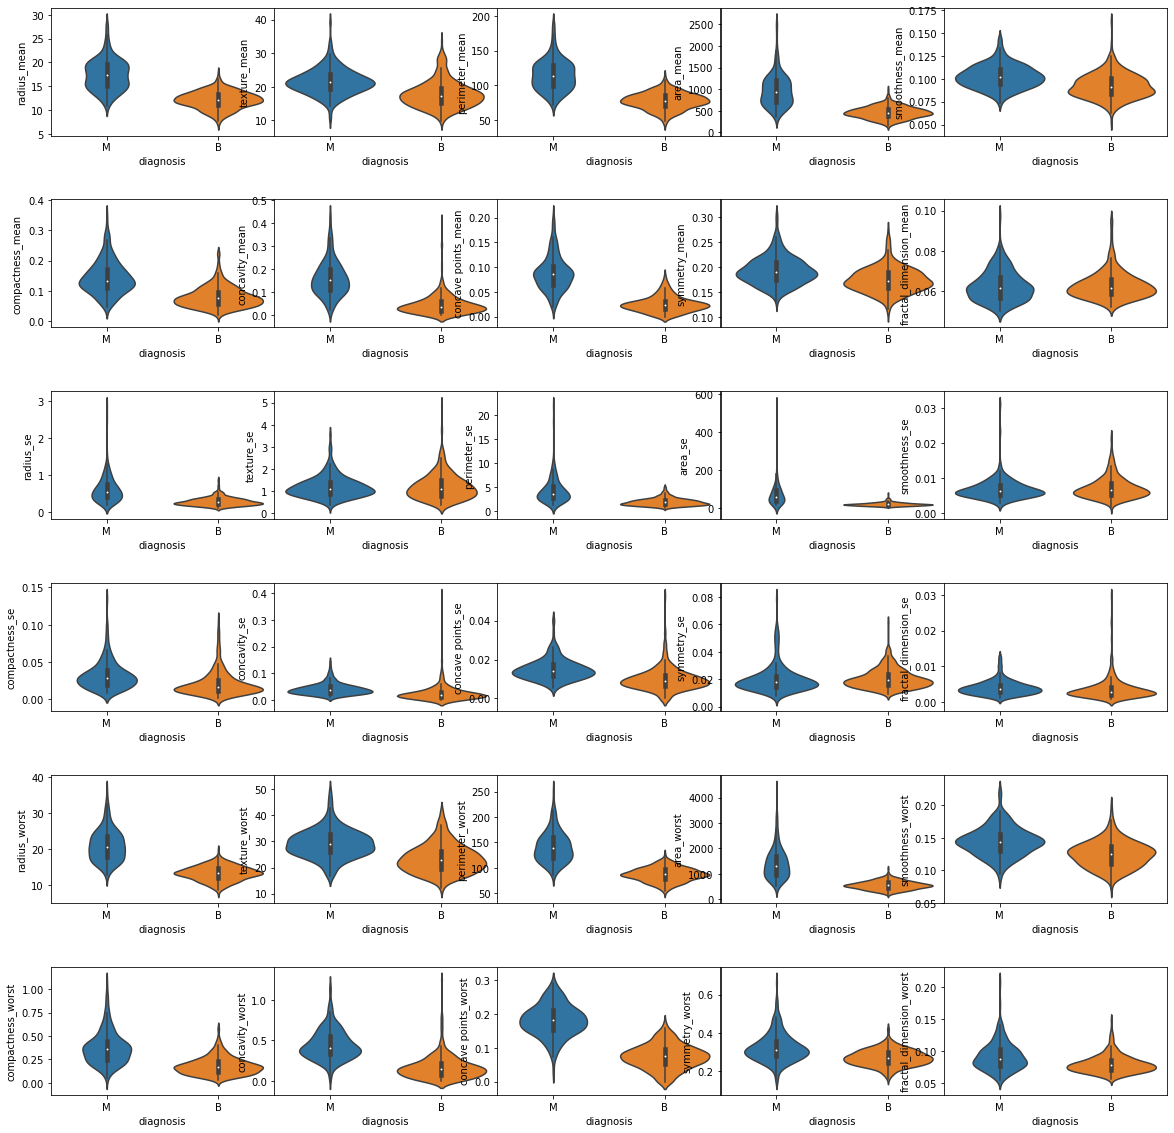

In [134]:
fig, axs = plt.subplots(6,5, figsize=(20, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)
df_ = df.drop(columns = ['diagnosis'])
axs = axs.ravel()

for col,i in zip(df_.columns, range(df_.shape[1])):
    sns.violinplot(x="diagnosis", y=col, data=df, ax = axs[i])

#### Наибольшее влияние на целевую переменную оказывают те признаки, распределение которых относительно цлелевой переменной отличается больше (математичски распрделение можно оценить через среднее значение и дисперсию признака). Судя по графикам boxplot и violin переменных наибольшая разница в распредениях у признаков radius_mean, concave points_worst, concavity_worst, area_worst и прочие.